In [98]:
import numpy as np
import pandas as pd

In [99]:
df = pd.read_csv("Bachelor Thesis\data_train.csv")
target = "CLASS"

In [100]:
df.head(10)

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.huawei.android.launcher.permission.CHANGE_BADGE,com.nbaimd.gametime.nba2011.permission.UA_DATA,com.android.browser.permission.WRITE_HISTORY_BOOKMARKS,com.cisco.anyconnect.vpn.android.permission.INTERNAL_VPN_STATE,com.huawei.launcher3.permission.WRITE_SETTINGS,android.permission.PREVENT_POWER_KEY,com.cloudmagic.mail.permission.C2D_MESSAGE,com.magazinecloner.anpt.permission.C2D_MESSAGE,android.permission.READ_MMS,CLASS
0,Signal-Android-website-prod-universal-release-...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,a.envisionmobile.caa.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,air.G2JValentineRoseEscape2017.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,air.com.playtika.slotomania.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ak.alizandro.smartaudiobookplayer.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,au.com.tapstyle.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,baby.com.DisneyCarToys.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,baby.com.KidsandToys.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,baby.com.ToysToSee.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,baby.com.kidsToysReview.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df.shape

(1168, 950)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 950 entries, NAME to CLASS
dtypes: int64(949), object(1)
memory usage: 8.5+ MB


In [103]:
df[target].unique()

array([0, 1], dtype=int64)

In [104]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df[target] = encoder.fit_transform(df[target])

In [105]:
df[target].unique()

array([0, 1], dtype=int64)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 950 entries, NAME to CLASS
dtypes: int64(949), object(1)
memory usage: 8.5+ MB


In [107]:
df[target].value_counts()

CLASS
1    602
0    566
Name: count, dtype: int64

In [108]:
X = df.loc[ : , df.columns != target] # features
X = X.loc[: , X.columns!="NAME"]
y = df[target]

In [109]:
X.columns

Index(['android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY',
       'android.permission.ACCESS_DOWNLOAD_MANAGER',
       'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
       'android.permission.ACCESS_DRM_CERTIFICATES',
       'android.permission.ACCESS_EPHEMERAL_APPS',
       'android.permission.ACCESS_FM_RADIO',
       ...
       'android.permission.READ_OWNER_DATA',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.nbaimd.gametime.nba2011.permission.UA_DATA',
       'com.android.browser.permission.WRITE_HISTORY_BOOKMARKS',
       'com.cisco.anyconnect.vpn.android.permission.INTERNAL_VPN_STATE',
       'com.huawei.launcher3.permission.WRITE_SETTINGS',
       'android.permission.PREVENT_POWER_KEY',
       'com.cloudmagic.mail.permission.C2D_M

# Feature selection

## Anova

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd


def anova(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_classif, k=5)
  fit = fs.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)

  featureScores = pd.concat([dfcolumns,dfscores],axis=1)

  featureScores.columns = ['Best_columns','Score_ANOVA']

  lyst = featureScores.nlargest(num_of_feat,'Score_ANOVA')
  ANOVA_feature=list(lyst['Best_columns'])
  return ANOVA_feature

## Pearson

In [ ]:
"""from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


def pearson(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_regression, k=5)
  fit = fs.fit(X,y)

  #create df for scores
  dfscores = pd.DataFrame(fit.scores_)
  #create df for column names
  dfcolumns = pd.DataFrame(df.columns)
  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  #naming the dataframe columns
  featureScores.columns = ['Best_columns','Score_pearsons']

  #print 10 best features
  lyst = featureScores.nlargest(num_of_feat,'Score_pearsons')

  PEARSON_feature=list(lyst['Best_columns'])
  return PEARSON_feature"""

## Univarient feature selection

In [ ]:
"""from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def u_f(X,y,num_of_feat):
  bestfeatures = SelectKBest(score_func=chi2, k=10)
  fit = bestfeatures.fit(X,y)

  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)


  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns



  sorted_df = featureScores.sort_values(by=['Score'], ascending=False)
  Univarient_feature = sorted_df["Specs"][:num_of_feat]
  return Univarient_feature"""

## Function Call

In [ ]:
anova_list = anova(X,y,150)
anova_list

In [ ]:
"""pearson_list = pearson(X,y,30)
pearson_list"""

In [ ]:
"""u_f_list = u_f(X,y,30)
u_f_list"""

In [ ]:
X = df.loc[:,anova_list]
y = df[target]

In [ ]:
X

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [111]:
y_train.value_counts()

CLASS
1    476
0    458
Name: count, dtype: int64

In [ ]:
"""from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)"""

In [ ]:
"""y_train.value_counts()"""

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 948 entries, android.permission.ACCESS_ALL_DOWNLOADS to android.permission.READ_MMS
dtypes: int64(948)
memory usage: 8.4 MB


In [113]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       108
           1       0.95      0.90      0.93       126

    accuracy                           0.92       234
   macro avg       0.92      0.92      0.92       234
weighted avg       0.92      0.92      0.92       234

[[102   6]
 [ 12 114]]
0.9230769230769231


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       108
           1       0.96      0.87      0.91       126

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.92      0.91      0.91       234

[[104   4]
 [ 17 109]]
0.9102564102564102


In [117]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, max_depth=10)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=10)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       108
           1       0.93      0.89      0.91       126

    accuracy                           0.90       234
   macro avg       0.90      0.90      0.90       234
weighted avg       0.90      0.90      0.90       234

[[ 99   9]
 [ 14 112]]
0.9017094017094017


# Grid Search CV

In [ ]:
"""from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_classifier = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)"""

In [ ]:
"""results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]"""

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100,max_depth=4, learning_rate=0.5)

gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=4)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       108
           1       0.96      0.90      0.93       126

    accuracy                           0.93       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.93      0.93      0.93       234

[[103   5]
 [ 12 114]]
0.9273504273504274


In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gb_classifier.predict(X_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       458
           1       1.00      0.99      0.99       476

    accuracy                           0.99       934
   macro avg       0.99      0.99      0.99       934
weighted avg       0.99      0.99      0.99       934

[[456   2]
 [  6 470]]
0.9914346895074947


# > **BruteForce Tuning for Gradient Boosting**

## Default Param

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100,max_depth=4, learning_rate=0.5)

gbc.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       108
           1       0.93      0.89      0.91       126

    accuracy                           0.90       234
   macro avg       0.90      0.90      0.90       234
weighted avg       0.90      0.90      0.90       234

[[ 99   9]
 [ 14 112]]
0.9017094017094017


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8247863247863247  >>>>>>> Train Accuracy: 0.8222698072805139
6/250 round completed......................... Test Accuracy: 0.8589743589743589  >>>>>>> Train Accuracy: 0.8640256959314775
11/250 round completed......................... Test Accuracy: 0.8717948717948718  >>>>>>> Train Accuracy: 0.8790149892933619
16/250 round completed......................... Test Accuracy: 0.8760683760683761  >>>>>>> Train Accuracy: 0.8843683083511777
21/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.892933618843683
26/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.8950749464668094
31/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.8993576017130621
36/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.901498929336

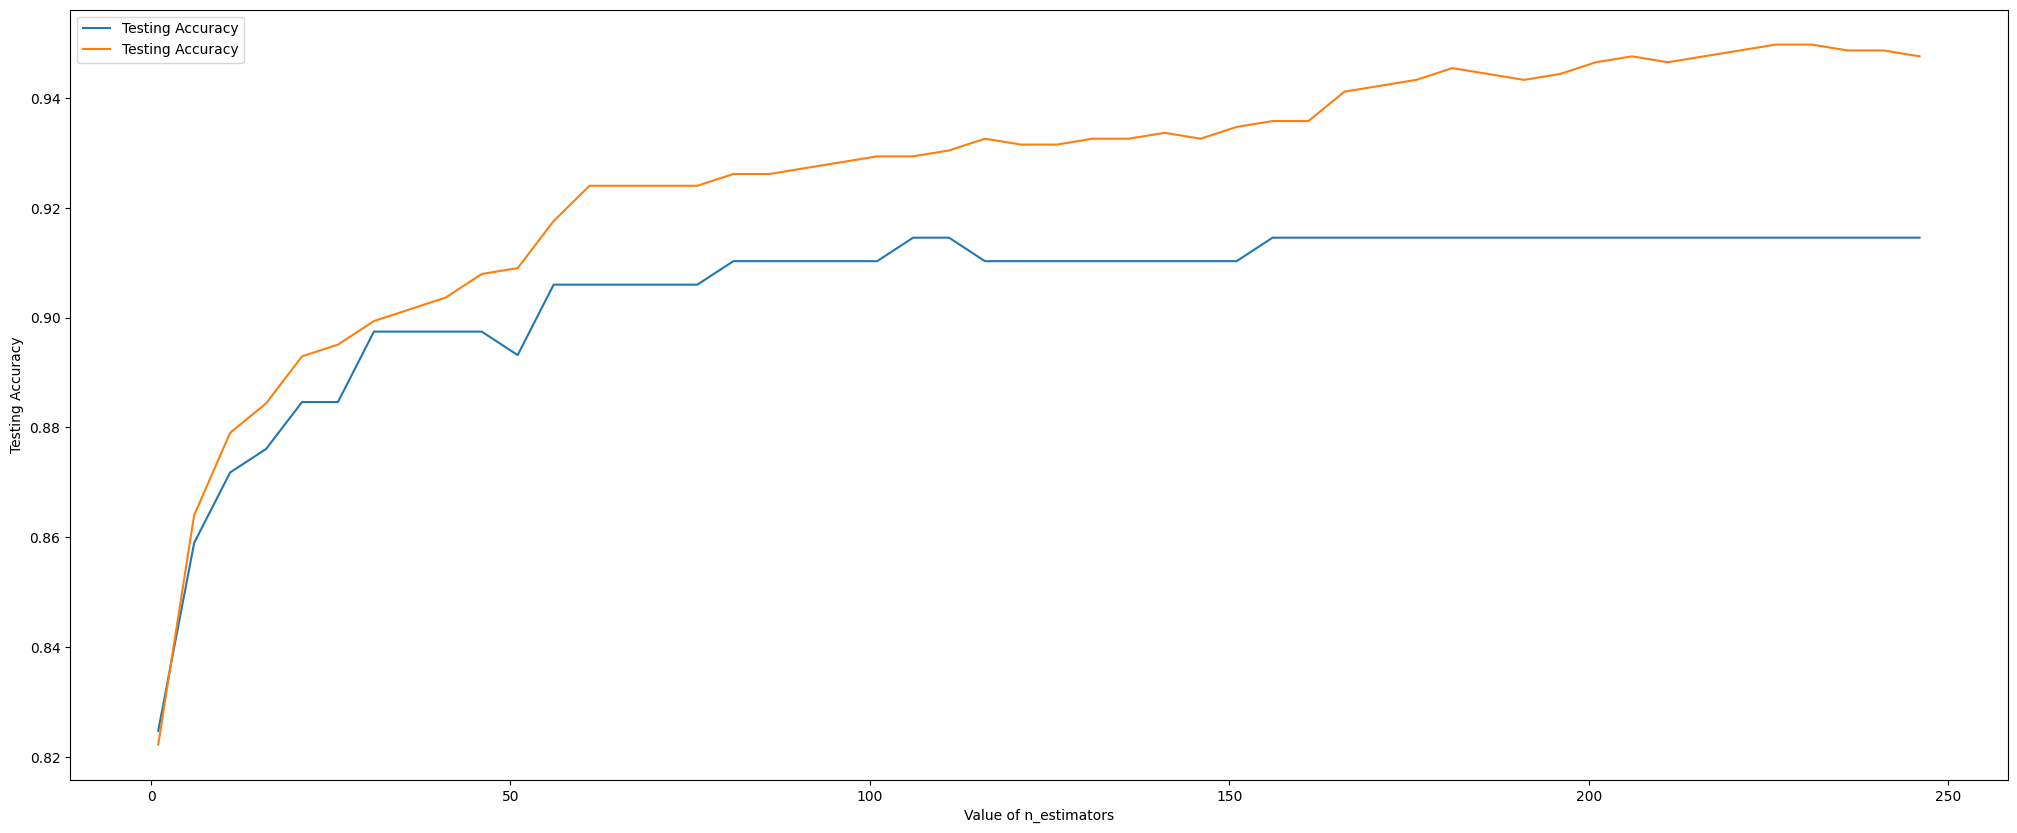

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.8760683760683761  >>>>>>> Train Accuracy: 0.8843683083511777
6/50 round completed......................... Test Accuracy: 0.9316239316239316  >>>>>>> Train Accuracy: 0.9850107066381156
11/50 round completed......................... Test Accuracy: 0.9273504273504274  >>>>>>> Train Accuracy: 0.9935760171306209
16/50 round completed......................... Test Accuracy: 0.8888888888888888  >>>>>>> Train Accuracy: 0.9935760171306209
21/50 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9935760171306209
26/50 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9935760171306209
31/50 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9935760171306209
36/50 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9935760171306209
41

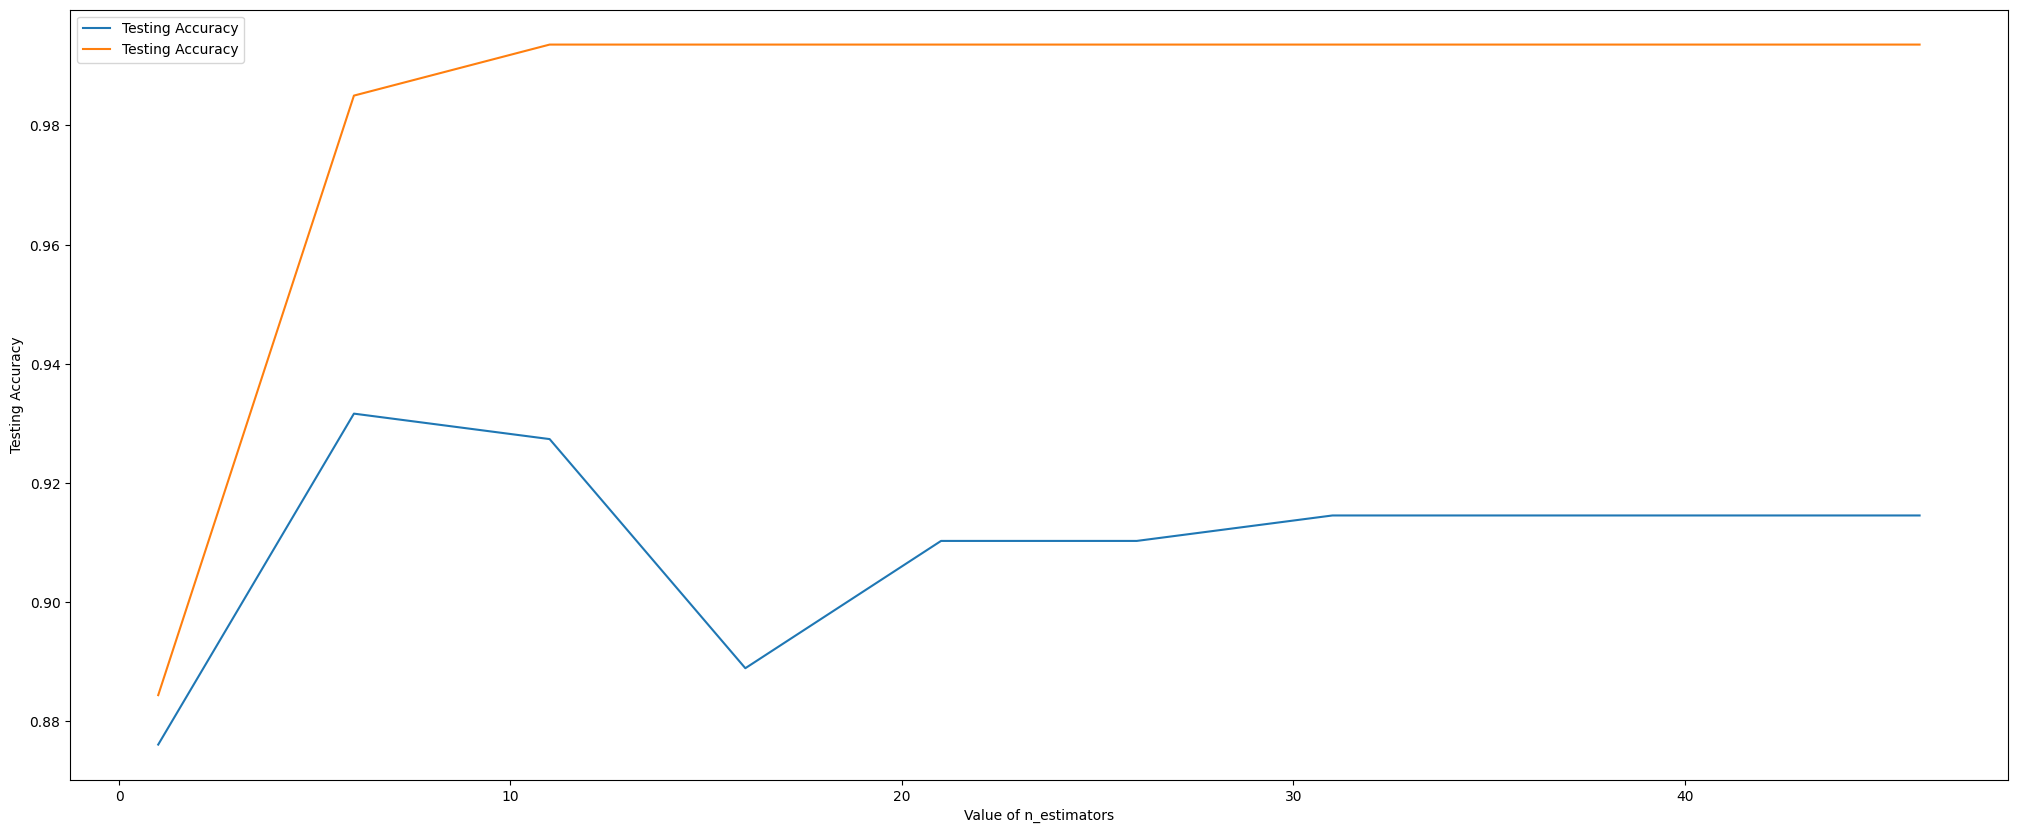

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [125]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9316239316239316


In [126]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9860813704496788


In [127]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9145299145299145


In [128]:
rf_all = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9293361884368309


# > **BruteForce Tuning for Randomforest**

## Default Param

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred_test=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test,y_pred_test))

[[ 99   9]
 [ 12 114]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       108
           1       0.93      0.90      0.92       126

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.91      0.91      0.91       234

Accurecy:  0.9102564102564102


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8418803418803419  >>>>>>> Train Accuracy: 0.9464668094218416
6/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9839400428265525
11/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9903640256959315
16/250 round completed......................... Test Accuracy: 0.9273504273504274  >>>>>>> Train Accuracy: 0.9914346895074947
21/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9935760171306209
26/250 round completed......................... Test Accuracy: 0.9273504273504274  >>>>>>> Train Accuracy: 0.9935760171306209
31/250 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9935760171306209
36/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.99357601713

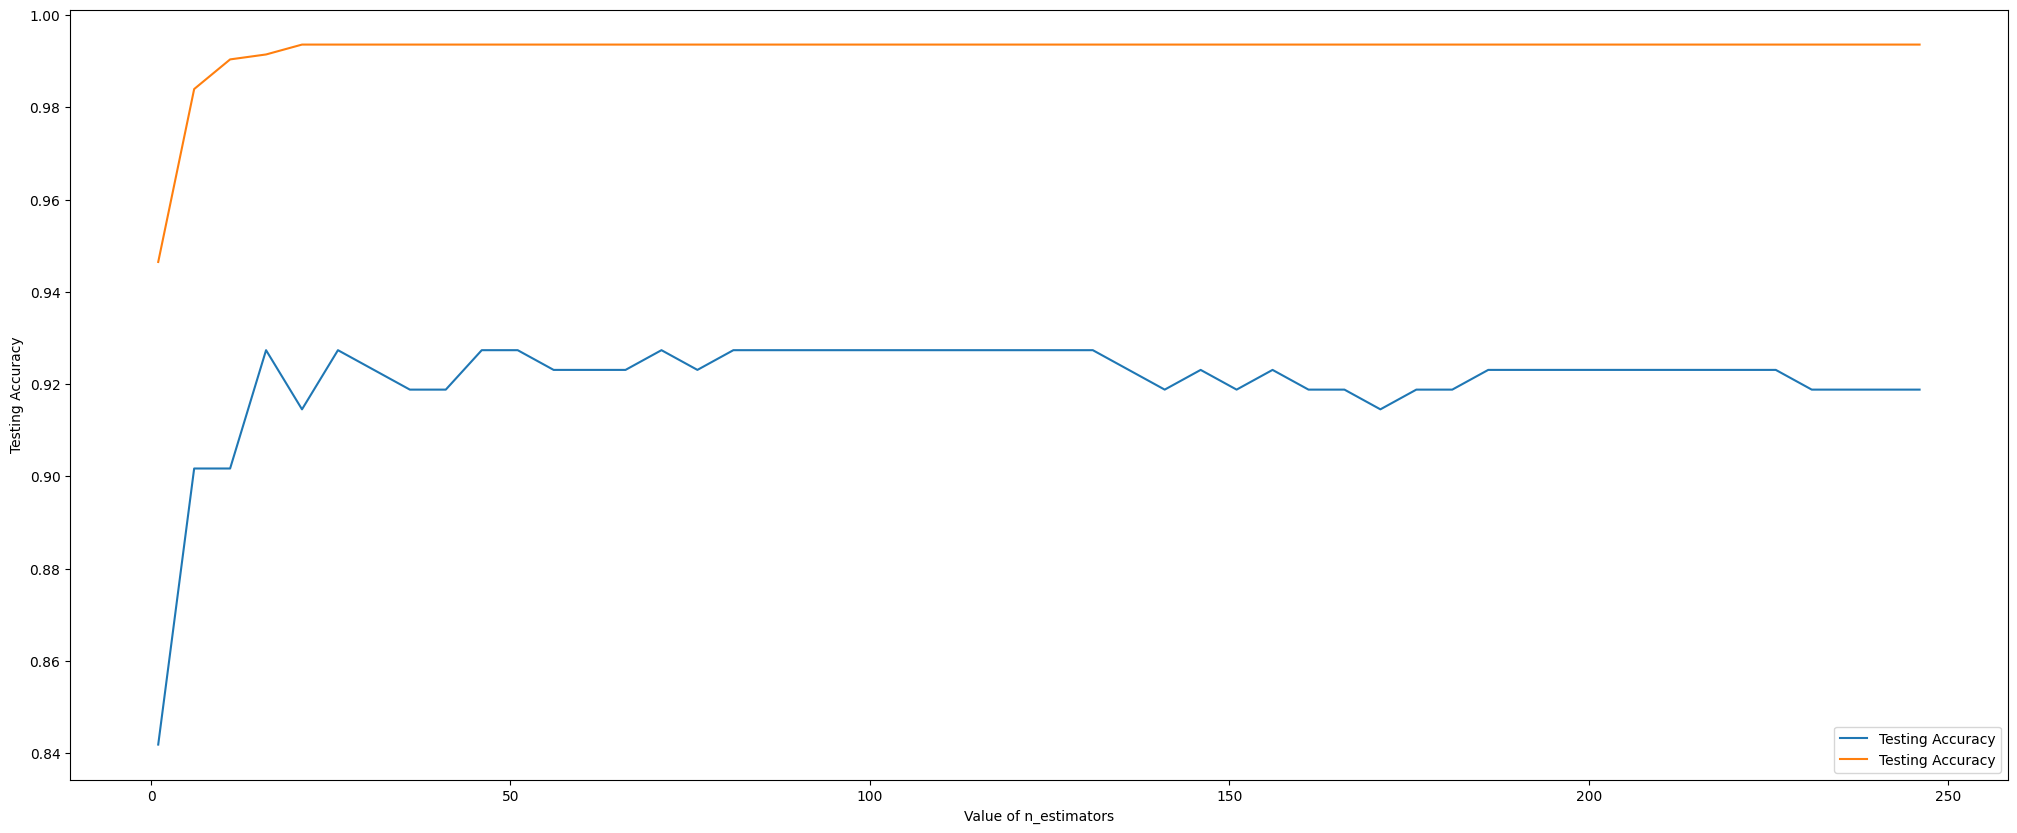

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.7649572649572649  >>>>>>> Train Accuracy: 0.7987152034261242
6/50 round completed......................... Test Accuracy: 0.8461538461538461  >>>>>>> Train Accuracy: 0.8629550321199143
11/50 round completed......................... Test Accuracy: 0.8589743589743589  >>>>>>> Train Accuracy: 0.9154175588865097
16/50 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.9453961456102784
21/50 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.9603854389721628
26/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9785867237687366
31/50 round completed......................... Test Accuracy: 0.9273504273504274  >>>>>>> Train Accuracy: 0.9925053533190579
36/50 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9935760171306209
41

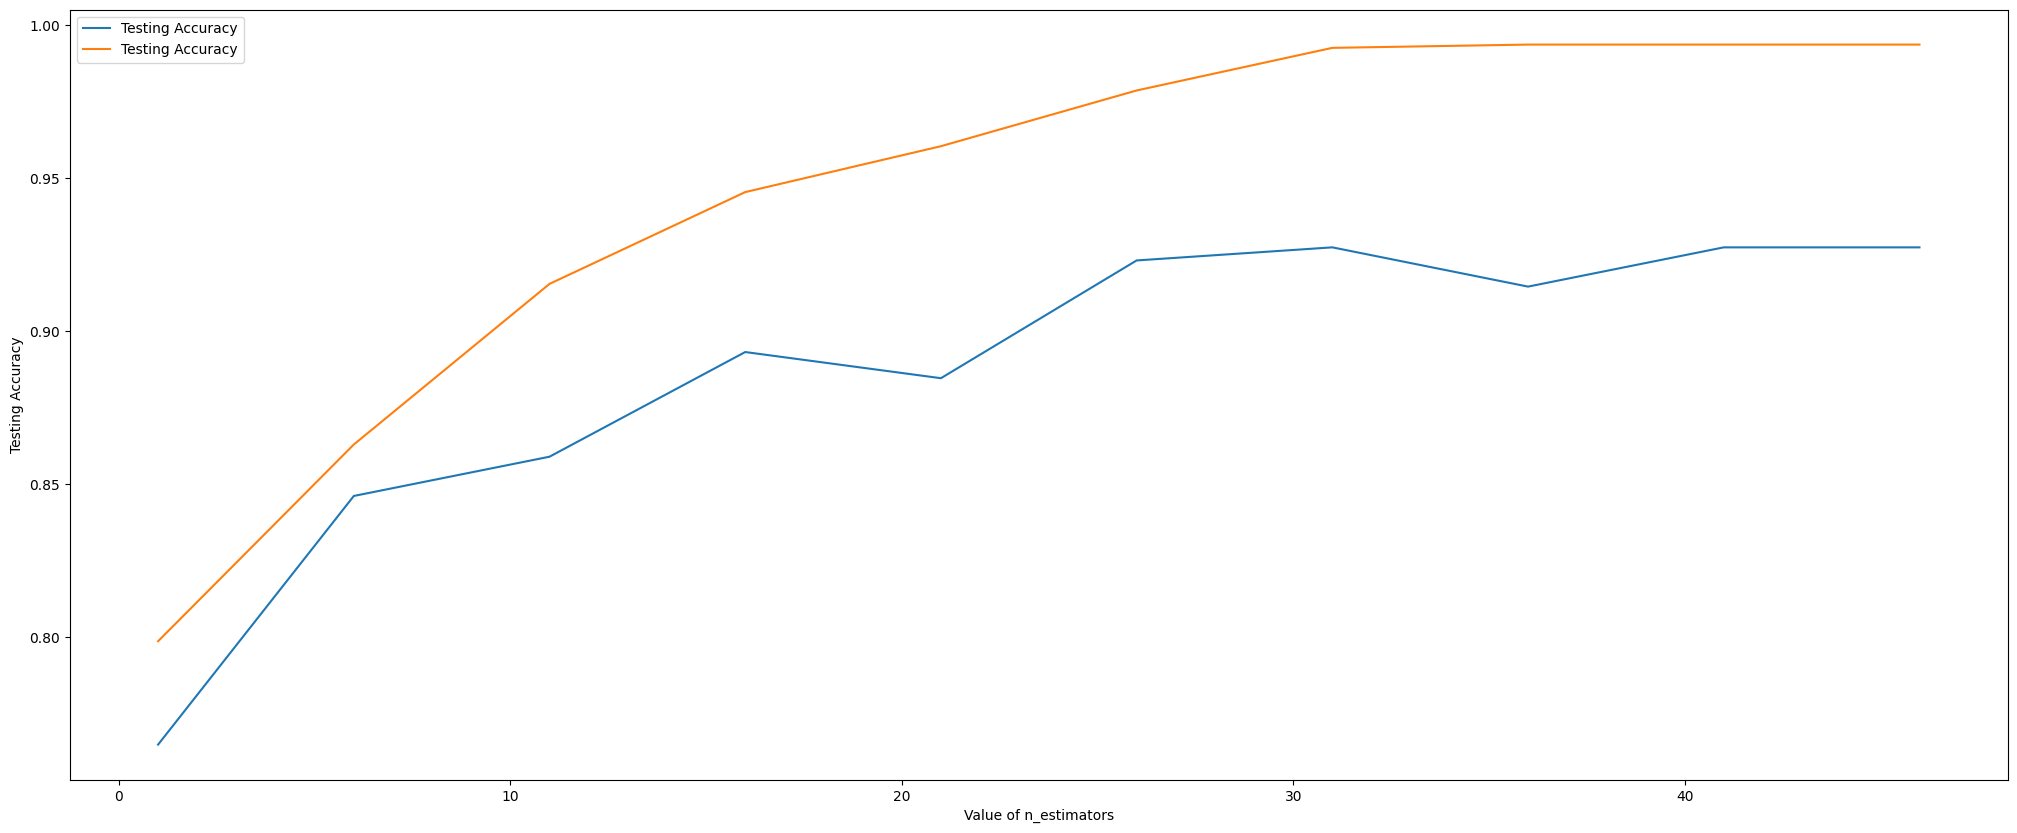

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [132]:
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9188034188034188


In [133]:
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9892933618843683


# > **BruteForce Tuning for AdaBoosting**

## Default Param

In [134]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)

ada_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = ada_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.95      0.88       108
           1       0.95      0.83      0.89       126

    accuracy                           0.88       234
   macro avg       0.89      0.89      0.88       234
weighted avg       0.89      0.88      0.88       234

[[103   5]
 [ 22 104]]
0.8846153846153846


## Tuning n_estimators

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1/250 round completed......................... Test Accuracy: 0.6794871794871795  >>>>>>> Train Accuracy: 0.7130620985010707
6/250 round completed......................... Test Accuracy: 0.8376068376068376  >>>>>>> Train Accuracy: 0.8340471092077087
11/250 round completed......................... Test Accuracy: 0.8504273504273504  >>>>>>> Train Accuracy: 0.854389721627409


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


16/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.8768736616702355


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


21/250 round completed......................... Test Accuracy: 0.8803418803418803  >>>>>>> Train Accuracy: 0.8811563169164882


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


26/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.8907922912205567


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


31/250 round completed......................... Test Accuracy: 0.8888888888888888  >>>>>>> Train Accuracy: 0.8907922912205567


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


36/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.8993576017130621


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


41/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9025695931477516


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


46/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9047109207708779


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


51/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.9025695931477516


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


56/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9154175588865097


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


61/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9207708779443254


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


66/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9207708779443254


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


71/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9218415417558886


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


76/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.9229122055674518


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


81/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9282655246252677


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


86/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9271948608137045


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


91/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9293361884368309


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


96/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9293361884368309


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


101/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.930406852248394


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


106/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9314775160599572


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


111/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9325481798715204


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


116/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.930406852248394


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


121/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9325481798715204


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


126/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9346895074946466


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


131/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9357601713062098


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


136/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9389721627408993


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


141/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9400428265524625


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


146/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9421841541755889


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


151/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.943254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


156/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.943254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


161/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9443254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


166/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9421841541755889


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


171/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.943254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


176/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9443254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


181/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


186/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


191/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


196/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9443254817987152


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


201/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


206/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


211/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


216/250 round completed......................... Test Accuracy: 0.905982905982906  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


221/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


226/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


231/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9475374732334048


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


236/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9464668094218416


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


241/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9453961456102784


c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


246/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9464668094218416
The best n_estimators:
81


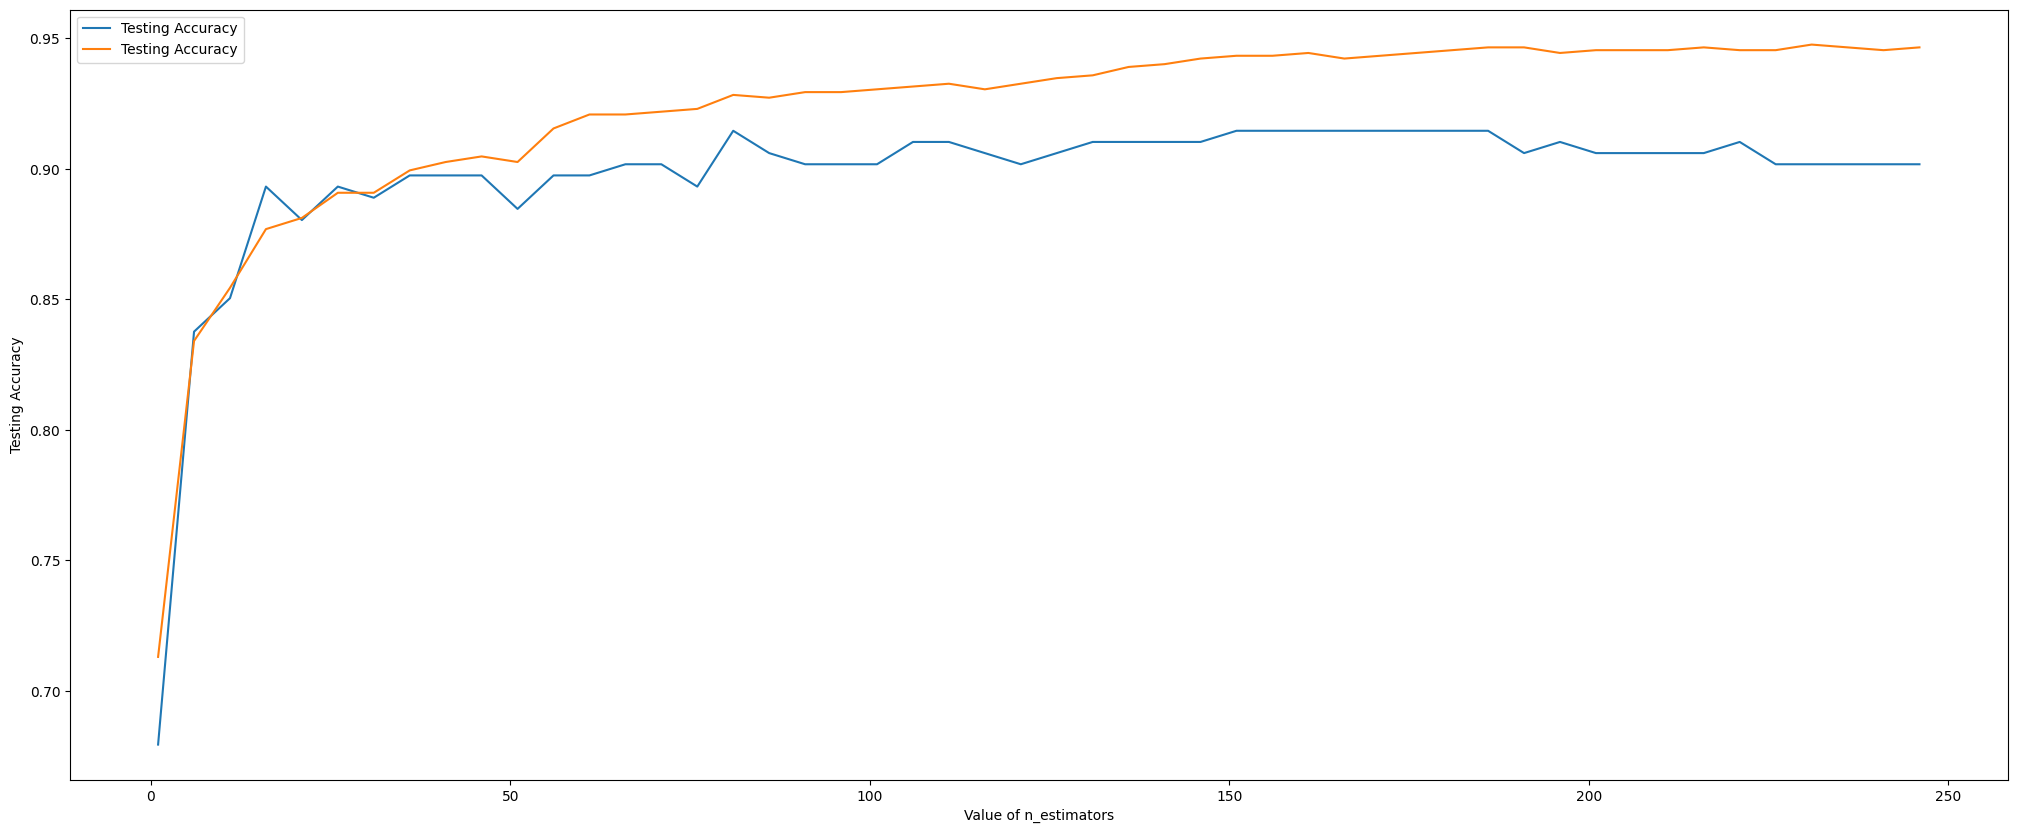

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
#from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [136]:
rf_all = AdaBoostClassifier(n_estimators=best_estimator, random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accurecy:  0.9145299145299145


In [137]:
rf_all = AdaBoostClassifier(n_estimators=best_estimator, random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

c:\Users\Dell\anaconda3\envs\Test\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accurecy:  0.9282655246252677


# > **BruteForce Tuning for HistGradientBoostingClassifier**

## Default parameter

In [138]:
from sklearn.ensemble import HistGradientBoostingClassifier

hb_classifier = HistGradientBoostingClassifier(max_iter=100, max_depth=4, learning_rate=0.5)

hb_classifier.fit(X_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = hb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       108
           1       0.97      0.90      0.93       126

    accuracy                           0.93       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.93      0.93      0.93       234

[[104   4]
 [ 13 113]]
0.9273504273504274


## Tuning max_iter

1/250 round completed......................... Test Accuracy: 0.8376068376068376  >>>>>>> Train Accuracy: 0.8490364025695931
6/250 round completed......................... Test Accuracy: 0.8504273504273504  >>>>>>> Train Accuracy: 0.8704496788008566
11/250 round completed......................... Test Accuracy: 0.8846153846153846  >>>>>>> Train Accuracy: 0.9068522483940042
16/250 round completed......................... Test Accuracy: 0.8760683760683761  >>>>>>> Train Accuracy: 0.9057815845824411
21/250 round completed......................... Test Accuracy: 0.8931623931623932  >>>>>>> Train Accuracy: 0.9218415417558886
26/250 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.9421841541755889
31/250 round completed......................... Test Accuracy: 0.9017094017094017  >>>>>>> Train Accuracy: 0.9475374732334048
36/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.95396145610

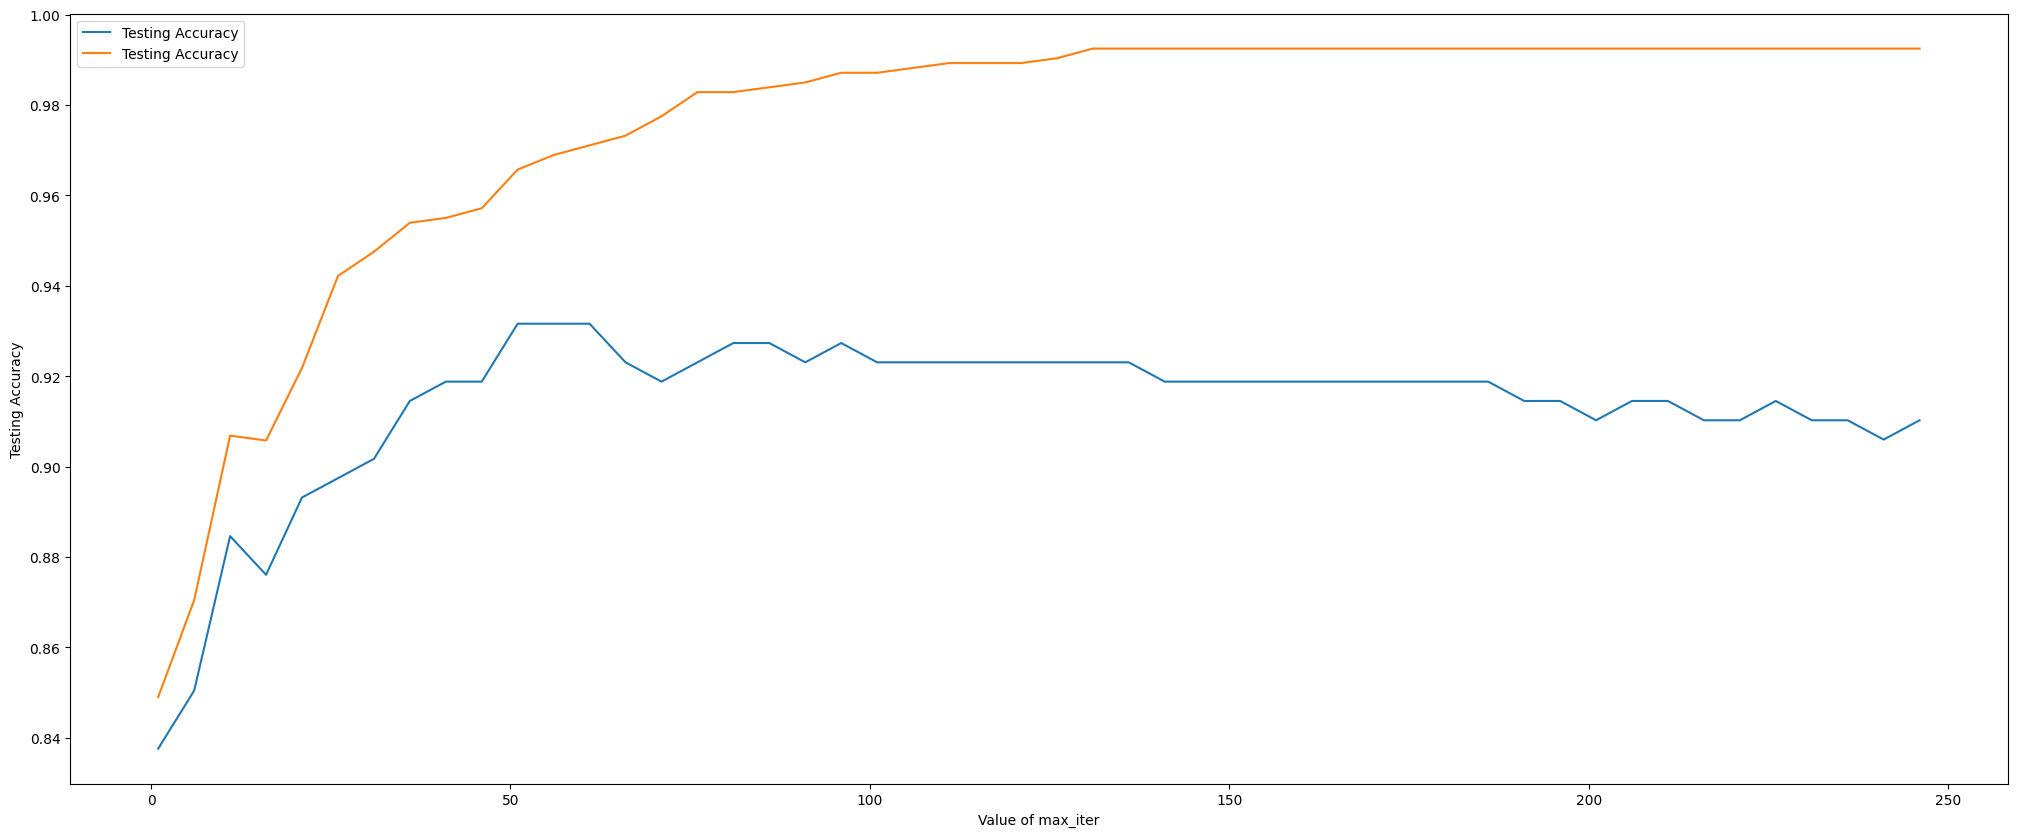

In [139]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
#from tqdm.notebook import tqdm

N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
#for k in tqdm(k_range):
for k in (k_range):
  classifier = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of max_iter')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

## Tuning max_depth

1/50 round completed......................... Test Accuracy: 0.8717948717948718  >>>>>>> Train Accuracy: 0.8758029978586723
6/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9507494646680942
11/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9785867237687366
16/50 round completed......................... Test Accuracy: 0.9273504273504274  >>>>>>> Train Accuracy: 0.9839400428265525
21/50 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.987152034261242
26/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.987152034261242
31/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.987152034261242
36/50 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.987152034261242
41/50 

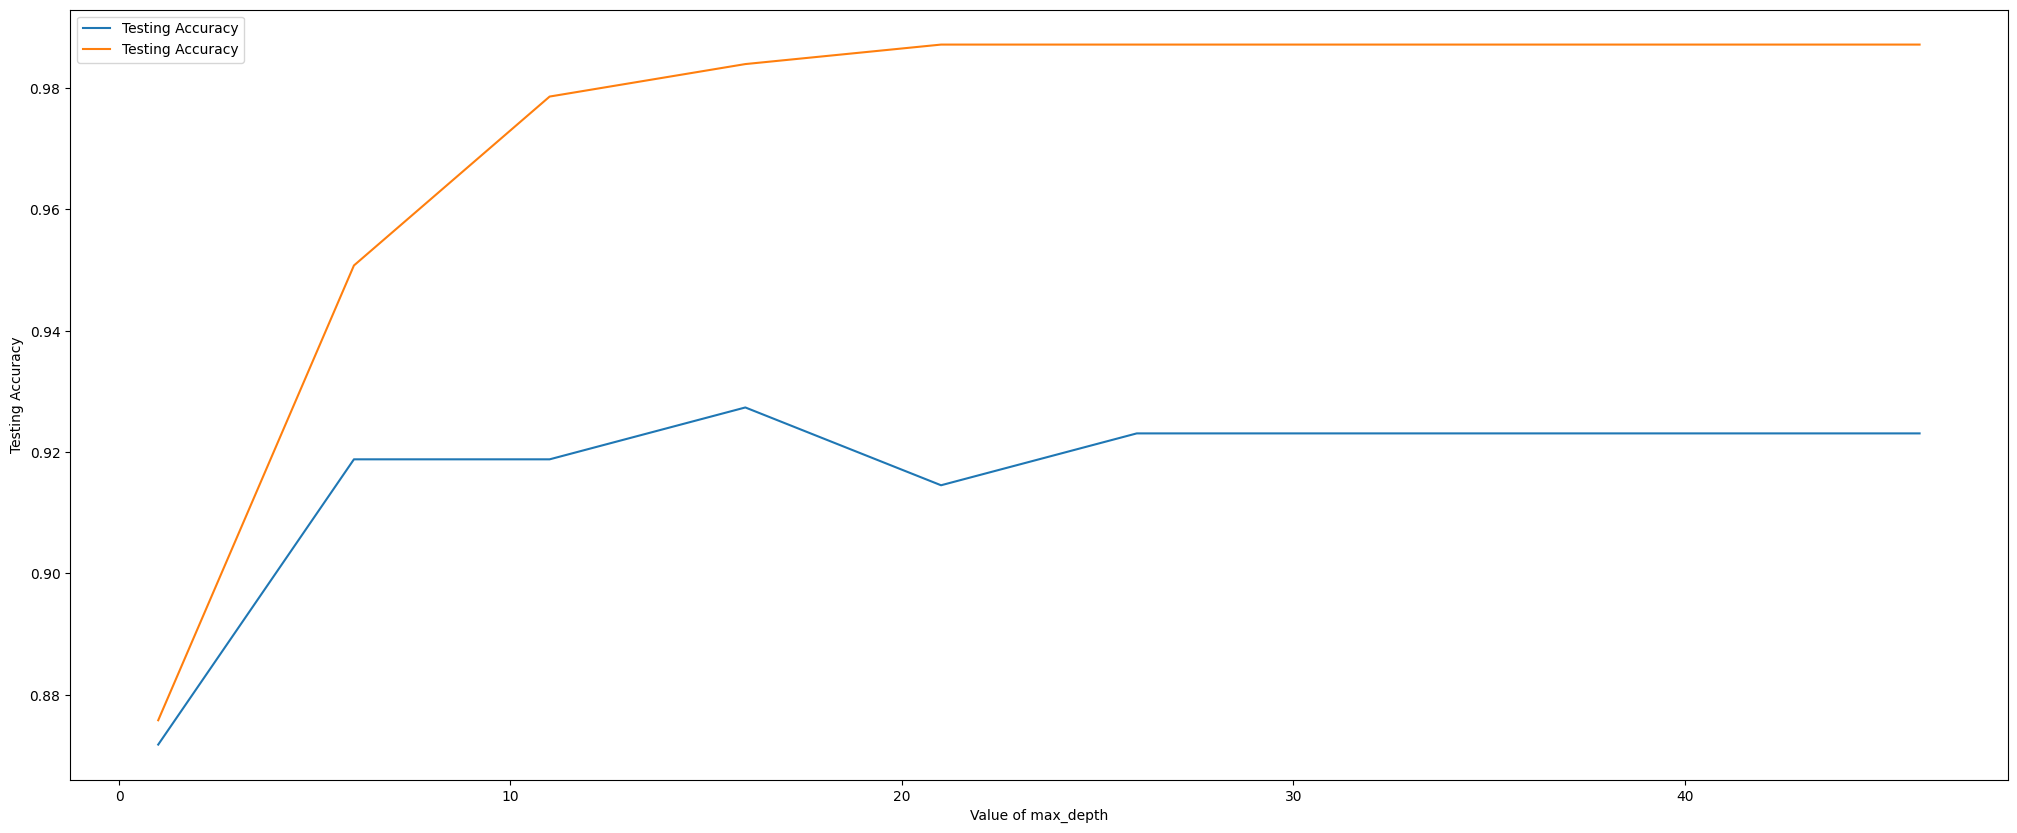

In [140]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of max_depth')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [141]:
rf_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9316239316239316


In [142]:
rf_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9646680942184154


# > **BruteForce Tuning for XGBoost**

## Default parameter

In [143]:
import xgboost as xgb
rf_default = xgb.XGBClassifier() # Create an instance of XGBoost classifier
rf_default.fit(X_train, y_train) # Train the classifier
y_pred_test = rf_default.predict(X_test) # Predict on the test data

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[104   4]
 [ 12 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       108
           1       0.97      0.90      0.93       126

    accuracy                           0.93       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.93      0.93      0.93       234


Accuracy: 0.9316239316239316


## Tuning n_estimators

1/250 round completed......................... Test Accuracy: 0.8675213675213675  >>>>>>> Train Accuracy: 0.8736616702355461
6/250 round completed......................... Test Accuracy: 0.8888888888888888  >>>>>>> Train Accuracy: 0.9164882226980728
11/250 round completed......................... Test Accuracy: 0.9102564102564102  >>>>>>> Train Accuracy: 0.9325481798715204
16/250 round completed......................... Test Accuracy: 0.9230769230769231  >>>>>>> Train Accuracy: 0.9411134903640257
21/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.943254817987152
26/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9475374732334048
31/250 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9571734475374732
36/250 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.970021413276

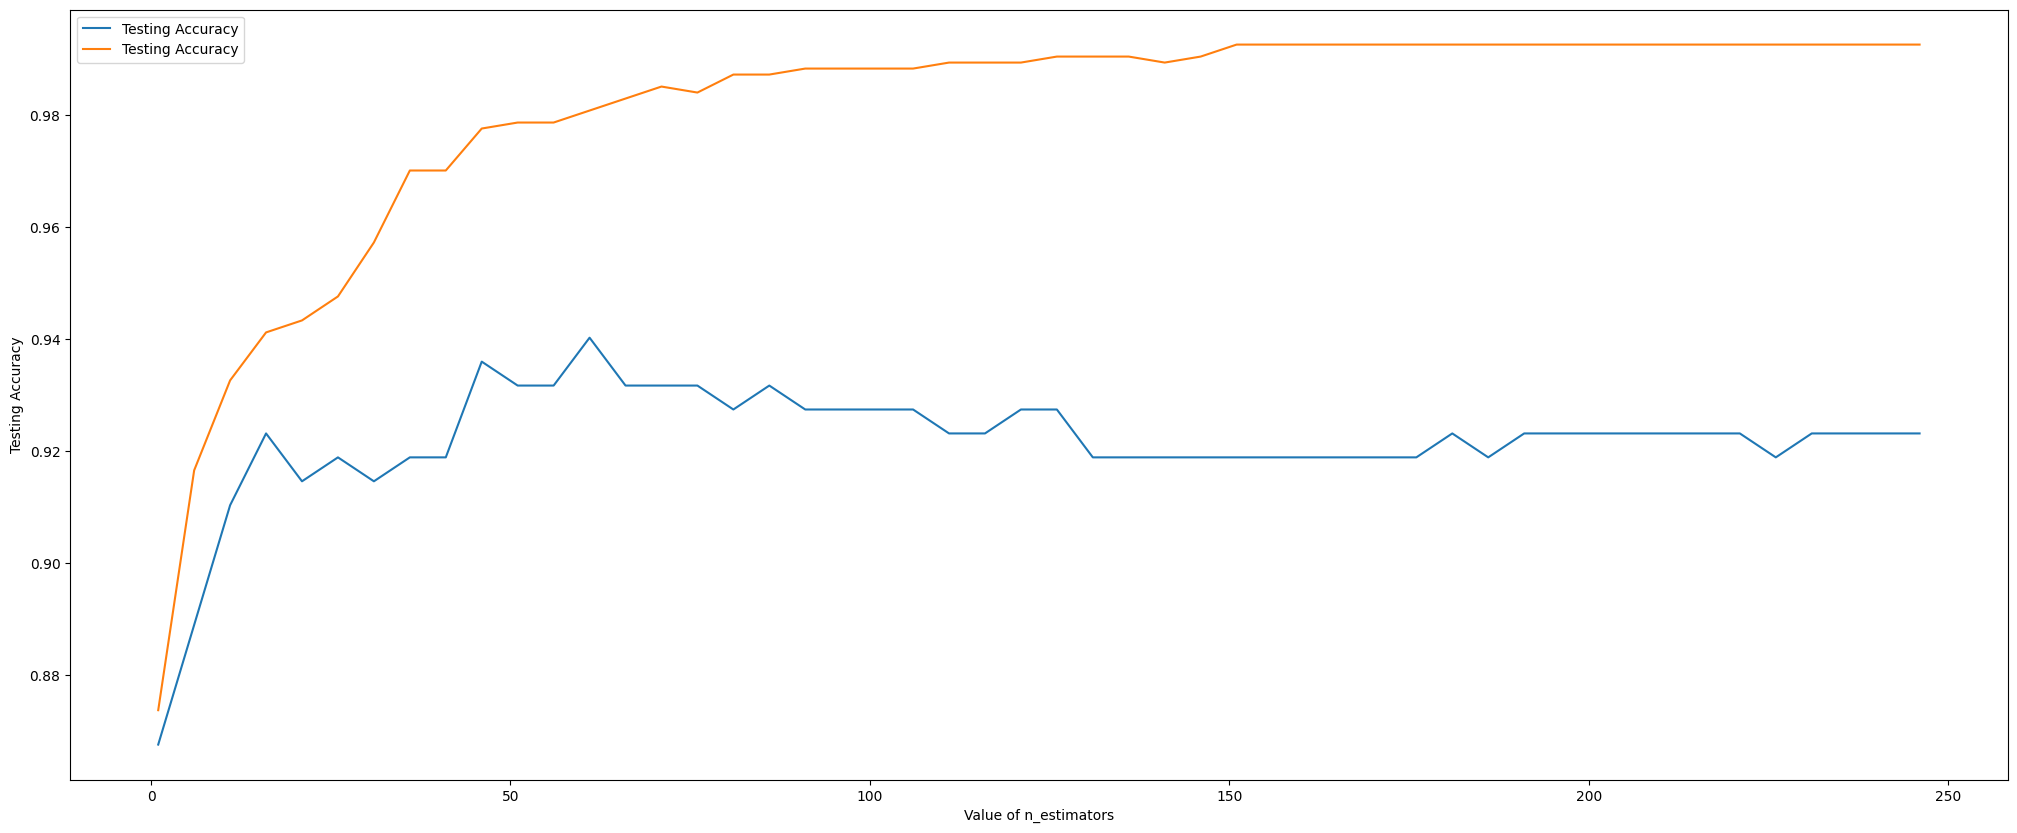

In [144]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/50 round completed......................... Test Accuracy: 0.8974358974358975  >>>>>>> Train Accuracy: 0.8897216274089935
6/50 round completed......................... Test Accuracy: 0.9316239316239316  >>>>>>> Train Accuracy: 0.9882226980728052
11/50 round completed......................... Test Accuracy: 0.9145299145299145  >>>>>>> Train Accuracy: 0.9925053533190579
16/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
21/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
26/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
31/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
36/50 round completed......................... Test Accuracy: 0.9188034188034188  >>>>>>> Train Accuracy: 0.9925053533190579
41

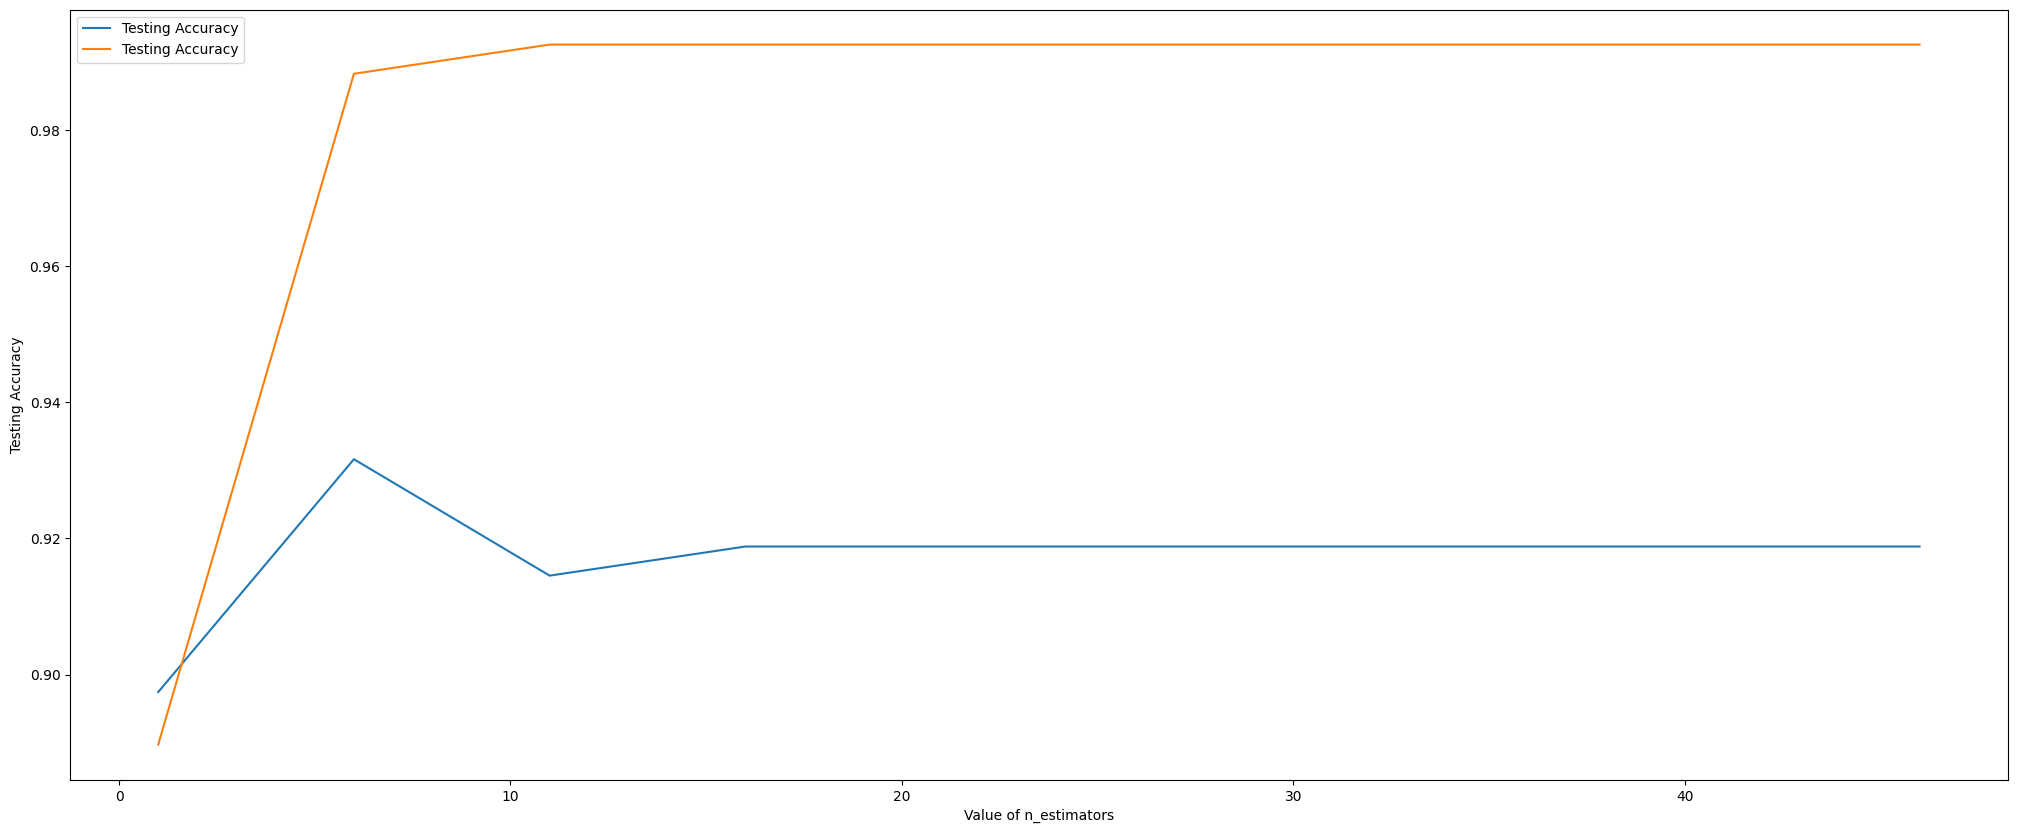

In [145]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [146]:
rf_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9401709401709402


In [147]:
rf_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9807280513918629


In [ ]:
from catboost import CatBoostClassifier
rf_default = CatBoostClassifier()
rf_default.fit(X_train, y_train)
y_pred_test=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test,y_pred_test))

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = CatBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
N=10
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = CatBoostClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_test)
  test_accu = accuracy_score(y_test,y_pred)
  scores[k] = test_accu
  scores_list.append(test_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Test Accuracy: "+str(test_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
rf_all = CatBoostClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

In [ ]:
rf_all = CatBoostClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))